# Principio de Segregación de Interfaces (Interface Segregation Principle)

## Introducción
El principio de segregación de interfaces (ISP) indica que los clientes no deben verse forzados a depender de interfaces que no utilizan. Es preferible tener varias interfaces específicas en lugar de una general.

## Objetivos
- Comprender el principio de segregación de interfaces y su aplicación en Python.
- Identificar violaciones al ISP en jerarquías de clases.
- Aplicar el ISP para crear sistemas más flexibles y desacoplados.

## Ejemplo de la vida real
En una cafetería, el menú para clientes y el menú para empleados son diferentes: cada uno ve solo lo que necesita, no todo el menú completo.

# Principio de Segregación de Interfaces (Interface Segregation Principle, ISP)

## Introducción

El Principio de Segregación de Interfaces (ISP) es uno de los cinco principios SOLID de diseño orientado a objetos. Fue introducido por Robert C. Martin y establece que los clientes no deberían verse obligados a depender de interfaces que no utilizan. En otras palabras, es mejor tener muchas interfaces específicas y pequeñas que una única interfaz general y grande.

## Explicación Detallada

### Definición

- **ISP**: Los clientes no deberían verse obligados a depender de interfaces que no utilizan.

### Beneficios del ISP

1. **Mantenibilidad**: Facilita la modificación del código sin afectar a los clientes que no utilizan ciertas funcionalidades.

2. **Reusabilidad**: Promueve la creación de interfaces específicas y reutilizables.

3. **Flexibilidad**: Permite a los clientes depender solo de las funcionalidades que realmente necesitan.

## Ejemplos Explicados

### Ejemplo Correcto

Supongamos que estamos desarrollando una aplicación para gestionar diferentes tipos de trabajadores. Aplicando el ISP, podríamos tener las siguientes interfaces y clases:


In [1]:
from abc import ABC, abstractmethod

from class_poo.polimorfismo import avion


class Worker(ABC):
    @abstractmethod
    def work(self) -> None:
        pass


class Eater(ABC):
    @abstractmethod
    def eat(self) -> None:
        pass


class Developer(Worker, Eater):
    def work(self) -> None:
        print("El desarrollador está trabajando.")

    def eat(self) -> None:
        print("El desarrollador está comiendo.")


class Robot(Worker):
    def work(self) -> None:
        print("El robot está trabajando.")

In [2]:
# Ejemplo de uso
developer = Developer()
robot = Robot()

developer.work()
developer.eat()
robot.work()

El desarrollador está trabajando.
El desarrollador está comiendo.
El robot está trabajando.


#### Análisis del Ejemplo Correcto

- **Worker**: Define la interfaz para trabajar.

- **Eater**: Define la interfaz para comer.

- **Developer**: Implementa ambas interfaces, ya que un desarrollador puede trabajar y comer.

- **Robot**: Implementa solo la interfaz `Worker`, ya que un robot solo puede trabajar.

Este diseño permite que los clientes dependan solo de las interfaces que realmente necesitan. Por ejemplo, un cliente que necesita un trabajador solo necesita depender de la interfaz `Worker`.

### Ejemplo de Violación del ISP

Veamos un ejemplo donde se viola el ISP:

In [3]:
class Worker:
    def work(self) -> None:
        pass

    def eat(self) -> None:
        pass


class Developer(Worker):
    def work(self) -> None:
        print("El desarrollador está trabajando.")

    def eat(self) -> None:
        print("El desarrollador está comiendo.")


class Robot(Worker):
    def work(self) -> None:
        print("El robot está trabajando.")

    def eat(self) -> None:
        # Los robots no comen, pero deben implementar este método
        pass

In [4]:
# Ejemplo de uso
developer = Developer()
robot = Robot()

developer.work()
developer.eat()
robot.work()
robot.eat()  # Este método no tiene sentido para un robot

El desarrollador está trabajando.
El desarrollador está comiendo.
El robot está trabajando.


#### Análisis del Ejemplo Incorrecto

- **Worker**: Tiene métodos que no son relevantes para todos los clientes (por ejemplo, `eat` para un robot).

- **Robot**: Se ve obligado a implementar el método `eat`, aunque no tiene sentido para un robot.

Este diseño viola el ISP porque los clientes (en este caso, `Robot`) se ven obligados a depender de métodos que no utilizan.

## Conclusión

1. **Reducción de Dependencias**: El ISP reduce las dependencias innecesarias entre los clientes y las interfaces.

2. **Mantenibilidad**: Mejora la mantenibilidad del código al permitir cambios en las interfaces sin afectar a todos los clientes.

3. **Reusabilidad**: Promueve la creación de interfaces específicas y reutilizables.

4. **Flexibilidad**: Permite a los clientes depender solo de las funcionalidades que realmente necesitan.

Aplicar el ISP puede requerir la creación de múltiples interfaces específicas, pero los beneficios en términos de flexibilidad y mantenibilidad del software son significativos.

## Ejercicios prácticos y preguntas de reflexión

1. **Divide interfaces**: Observa una clase que implemente métodos que no utiliza. ¿Cómo podrías dividir la interfaz para que cada clase implemente solo lo necesario?
2. **Refactoriza**: Crea varias interfaces pequeñas y haz que las clases implementen solo las que requieran.
3. **Pregunta de reflexión**: ¿Qué problemas surgen cuando una clase depende de métodos que no usa?

## Autoevaluación
- ¿Mis clases implementan solo los métodos que realmente necesitan?
- ¿Qué ventajas aporta el ISP en proyectos grandes y colaborativos?

## Referencias y recursos
- [Interface Segregation Principle – Wikipedia](https://en.wikipedia.org/wiki/Interface_segregation_principle)
- [SOLID Principles en Python – Real Python](https://realpython.com/solid-principles-python/)
- [Ejemplo didáctico de ISP – Refactoring Guru](https://refactoring.guru/es/design-patterns/interface-segregation-principle)

## Ejemplo de implementacion de Segregacion de interface
- ### UML
@startuml
class Vehiculo {
    + encender(): str
    + abstract set_puertas(cantidad:int):None
    + abstract tanquear():str
}

abstract class VehiculoElectrico {
    - puertas:int
}



class Moto {

}

Vehiculo <|-- VehiculoElectrico
Vehiculo <|-- Moto

@enduml
- ###  [URL](https://editor.plantuml.com/uml/PP0x3i8m38RtIBc3nrQe5wWOkZ32o8gCQub88O74cGft9obf9QW7IxP_VtuCKJ18kbkjo6ACSEQReMGzJ5f1jXsm8tOZXwRj8KfOqdZD0P90PBay4WV1s10wCIEElN7IzYVlU2CNTC_4M70pxQsLLclrTuc3PP9WQDscWpgf3AYzKDotx-XbaTRYUix-rNLRxh-W06RYa4_EN_a0)
- ### IMG
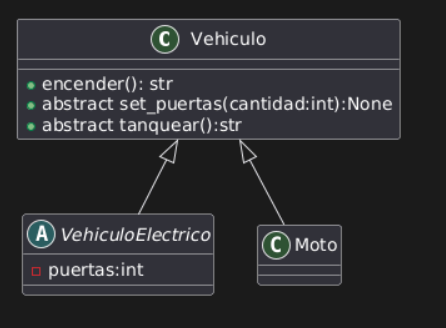

In [2]:
from abc import ABC, abstractmethod


class Vehiculo(ABC):

    def encender(self) -> None:
        print("Vehiculo encendido")

    @abstractmethod
    def tanquear(self) -> str: ...

    @abstractmethod
    def set_puertas(self, cantidad: int) -> None: ...


class VehiculoElectrico(Vehiculo):

    def tanquear(self) -> str:
        raise ValueError("Vehiculo electrico se carga no se tanquea")

    def set_puertas(self, cantidad: int) -> None:
        self.puertas = cantidad


class Moto(Vehiculo):

    def tanquear(self) -> str:
        return "Moto tanqueada"

    def set_puertas(self, cantidad: int) -> None:
        raise ValueError("Vehiculo electrico se carga no se tanquea")


moto = Moto()
print(moto.tanquear())
print(moto.encender())
print(moto.set_puertas(0))  # No debe aplicarse
electrico = VehiculoElectrico()
print(electrico.encender())
print(electrico.set_puertas(4))
print(electrico.tanquear())  # no debería aplicarse


Moto tanqueada
Vehiculo encendido
None


ValueError: Vehiculo electrico se carga no se tanquea

- ### UML CODE
@startuml
class Vehiculo {
    + encender(): str
}

abstract class VehiculoElectrico {
    + set_puertas(cantidad: int): void
    + recargar(): str
}

abstract class VehiculoSinPuerta {
    + tanquear(): str
}

class CarroElectrico {
    - puertas
    + set_puertas(cantidad: int): void
}

class Moto {
    + tanquear(): str
}

Vehiculo <|-- VehiculoElectrico
Vehiculo <|-- VehiculoSinPuerta
VehiculoElectrico <|.. CarroElectrico
VehiculoSinPuerta <|.. Moto
@enduml
- ### [URL](https://editor.plantuml.com/uml/ZL6z2i8m4Du3UOUC5MaVe7GeYACW2AvofeS6QggNgulrtOrLczeYzgORlh_xBdSCnFMfb4ANu9pQuj7ekgpKJGhbPwxGQhG5KZHBbMEIuYw55B3tEsXMtxHbYPh9w1xV8U_EDHA3YpHODWKKgJAMlTwrCiK7HwY13Z3DPsFikjKCFWpsKkEG_w8jW6YSBLRlNDEZzZHN5LV_tBisioQEnoNz0dJN1K08dpL9CZWem48lBUoPKOhS_y-_-040)
- ### IMG
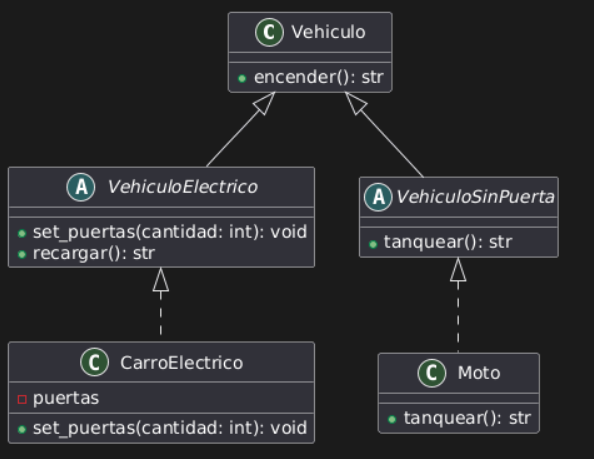
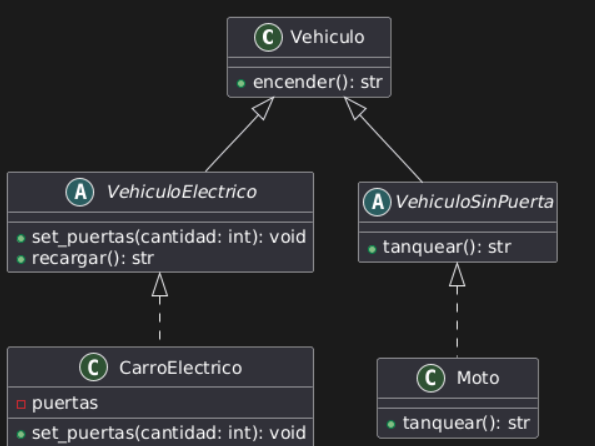
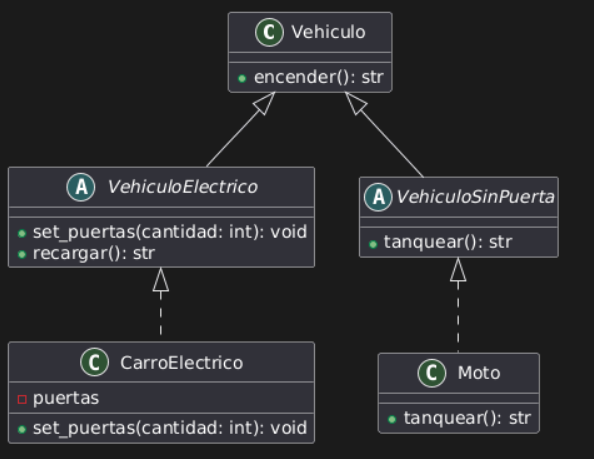

In [5]:
from abc import ABC, abstractmethod


class Vehiculo():

    def encender(self) -> str:
        return "Vehiculo encendido"


class VehiculoElectrico(Vehiculo, ABC):

    @abstractmethod
    def set_puertas(self, cantidad: int) -> None: ...

    def recargar(self) -> str:
        return "recargando vehiculo"


class VehiculoSinPuerta(Vehiculo, ABC):

    @abstractmethod
    def tanquear(self) -> str: ...


class CarroElectrico(VehiculoElectrico):

    def __init__(self):
        self.puertas = None

    def set_puertas(self, cantidad: int) -> None:
        self.puertas = cantidad


class Moto(VehiculoSinPuerta):

    def tanquear(self) -> str:
        return "El vehiculo esta tanqueado"


carro_electrico = CarroElectrico()
moto = Moto()
print(moto.encender())
print(moto.tanquear())
print(carro_electrico.encender())
carro_electrico.set_puertas(4)

Vehiculo encendido
El vehiculo esta tanqueado
Vehiculo encendido
